In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/drive/MyDrive/data/ratings.csv')#, sep='\t', names=['user_id','item_id','rating','titmestamp'])
df.head()

movie_titles = pd.read_csv('/content/drive/MyDrive/data/movies.csv')
''', sep='|', names=['item_id','movie_title','release','release_date' 'URL' , 'unknown' , 'Action' , 'Adventure' , 'Animation' ,
              'Children', 'Comedy','Crime','Documentary','Drama','Fantasy',
              'Film-Noir' , 'Horror' , 'Musical' , 'Mystery' , 'Romance','Sci-Fi',
              'Thriller', 'War', 'Western'],engine = 'python')'''
movie_titles.head()
#df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [40]:
df = pd.merge(df, movie_titles, on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [42]:
df.describe()
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()
ratings['number_of_ratings'] = df.groupby('title')['rating'].count()
ratings.head()

,rating,number_of_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


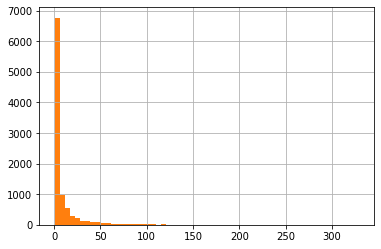

In [43]:
# Visualize:
import matplotlib.pyplot as plt
%matplotlib inline
ratings['rating'].hist(bins=50)
ratings['number_of_ratings'].hist(bins=60)

,rating,number_of_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278
Star Wars: Episode IV - A New Hope (1977),4.231076,251
Jurassic Park (1993),3.750000,238
Braveheart (1995),4.031646,237
Terminator 2: Judgment Day (1991),3.970982,224


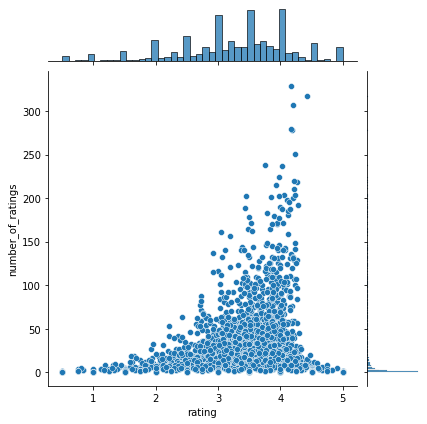

In [45]:
# Joint Plot:
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings)

movie_matrix = df.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.head()

ratings.sort_values('number_of_ratings', ascending=False).head(10)


In [62]:
# Collect the rate Similarities:
AFO_user_rating = movie_matrix['Air Force One (1997)']
contact_user_rating = movie_matrix['Contact (1997)']
#AFO_user_rating.head()
#contact_user_rating.head()
#similar_to_air_force_one=movie_matrix.corrwith(AFO_user_rating)
similar_to_air_force_one.head()
#similar_to_contact = movie_matrix.corrwith(contact_user_rating)
#similar_to_contact.head()


title
'71 (2014)                                NaN
'Hellboy': The Seeds of Creation (2004)   NaN
'Round Midnight (1986)                    NaN
'Salem's Lot (2004)                       NaN
'Til There Was You (1997)                 NaN
dtype: float64

In [63]:
# Get the correlations:
corr_contact = pd.DataFrame(similar_to_contact, columns=['Correlation'])
corr_contact.dropna(inplace=True)
corr_contact.head()
corr_AFO = pd.DataFrame(similar_to_air_force_one, columns=['correlation'])
corr_AFO.dropna(inplace=True)
corr_AFO.head()
corr_AFO = corr_AFO.join(ratings['number_of_ratings'])
corr_contact = corr_contact.join(ratings['number_of_ratings'])
corr_AFO .head()
corr_contact.head()

,Correlation,number_of_ratings
title,,
"'burbs, The (1989)",0.486761,17
(500) Days of Summer (2009),0.634064,42
*batteries not included (1987),0.868599,7
...And Justice for All (1979),1.000000,3
10 Things I Hate About You (1999),-0.102640,54


In [64]:
# Increase the threshold criterion:
corr_AFO[corr_AFO['number_of_ratings'] > 100].sort_values(by='correlation', ascending=False).head(10)
corr_contact[corr_contact['number_of_ratings'] > 100].sort_values(by='Correlation', ascending=False).head(10)


,Correlation,number_of_ratings
title,,
Sleepless in Seattle (1993),0.689602,106
American Pie (1999),0.670109,103
Clear and Present Danger (1994),0.641203,110
"Firm, The (1993)",0.640332,101
"Bourne Identity, The (2002)",0.639769,112
Outbreak (1995),0.586934,101
E.T. the Extra-Terrestrial (1982),0.569043,122
Apollo 13 (1995),0.563138,201
Die Hard: With a Vengeance (1995),0.552904,144
